In [1]:
import pandas as pd
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import numpy as np

In [2]:
# Load Dataset
df = pd.read_csv('rizz_dataset.csv')

In [3]:
# Eksplorasi Data (EDA)
print("First 5 rows:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nUnique values distribution for 'answer':")
print(df['answer'].value_counts().to_markdown(numalign="left", stralign="left"))

First 5 rows:
| question                            | answer                                   |
|:------------------------------------|:-----------------------------------------|
| hi, how are you doing?              | i'm fine. how about yourself?            |
| i'm fine. how about yourself?       | i'm pretty good. thanks for asking.      |
| i'm pretty good. thanks for asking. | no problem. so how have you been?        |
| no problem. so how have you been?   | i've been great. what about you?         |
| i've been great. what about you?    | i've been good. i'm in school right now. |

Unique values distribution for 'answer':
| answer                                                                                            | count   |
|:--------------------------------------------------------------------------------------------------|:--------|
| what do you mean?                                                                                 | 22      |
| why not?                 

In [4]:
# Hitung jumlah sampel dan fitur
print(f"\nJumlah sampel: {df.shape[0]}")
print(f"Jumlah fitur: {df.shape[1]}")


Jumlah sampel: 3725
Jumlah fitur: 2


In [5]:
# Visualisasikan distribusi label 'answer' - Bar Chart
# Hitung jumlah kemunculan setiap label 'answer'
answer_counts = df['answer'].value_counts()

# Buat DataFrame baru dengan kolom 'label' dan 'count'
answer_counts_df = pd.DataFrame({
    'label': answer_counts.index,
    'count': answer_counts.values
})

In [6]:
# Buat bar chart menggunakan Altair
chart = alt.Chart(answer_counts_df, title='Distribusi Label "Rizz"').mark_bar().encode(
    x=alt.X('label:N', axis=alt.Axis(labelAngle=-45), title='Label'),
    y=alt.Y('count:Q', title='Frekuensi'),
    tooltip=['label', 'count']
).interactive()

# Simpan chart dalam format JSON
chart.save('answer_distribution_bar_chart.json')

In [7]:
# Pra-pemrosesan Teks
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = text.lower()  # Ubah ke huruf kecil
    return text

df['question'] = df['question'].astype(str).apply(clean_text)
df['answer'] = df['answer'].astype(str).apply(clean_text)

In [8]:
# Feature Extraction (TF-IDF)
# Combine 'question' and 'answer' for context
df['text'] = df['question'] + ' ' + df['answer']

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'])
y = df['answer']  # Labels are the 'answer' column

In [9]:
# Tentukan threshold frekuensi minimum untuk label
min_frequency = 5

# Hitung frekuensi label dan gabungkan label yang jarang muncul
label_counts = Counter(y)
common_labels = [label for label, count in label_counts.items() if count >= min_frequency]

print(f"Label distribution before merging rare labels:\n{label_counts}")
print(f"\nCommon labels:\n{common_labels}")

y = y.apply(lambda label: label if label in common_labels else 'other')

print(f"\nLabel distribution after merging rare labels:\n{Counter(y)}")

Label distribution before merging rare labels:
Counter({'what do you mean': 22, 'why not': 16, 'what happened': 10, 'me too': 9, 'why is that': 9, 'of course': 8, 'thank you': 7, 'like what': 7, 'so do i': 6, 'thats a good idea': 6, 'whats the matter': 6, 'yes i do': 5, 'i dont know': 5, 'what did you do': 5, 'why': 5, 'really': 4, 'yes i did': 4, 'so': 4, 'yes': 4, 'are you sure': 4, 'what are you talking about': 4, 'whys that': 4, 'thank you very much': 3, 'yes it is': 3, 'how come': 3, 'no i havent': 3, 'is that right': 3, 'where do you want to go': 3, 'what are you going to do': 3, 'whats that': 3, 'so whats the problem': 3, 'why do you say that': 3, 'how do you know': 3, 'yes they are': 3, 'thanks': 2, 'i believe so': 2, 'i hope you feel better': 2, 'i havent heard anything': 2, 'are you serious': 2, 'i appreciate that': 2, 'what kind': 2, 'it was a great game': 2, 'no thanks maybe another time': 2, 'i didnt know that': 2, 'of course i will': 2, 'no i didnt': 2, 'doing what': 2, '

In [10]:
# Split Data (Train-Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Evaluasi Model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.96

Classification Report:
                   precision    recall  f1-score   support

        like what       1.00      0.00      0.00         2
           me too       1.00      0.00      0.00         2
        of course       1.00      0.00      0.00         1
            other       0.96      1.00      0.98       716
          so do i       1.00      0.00      0.00         1
        thank you       1.00      0.00      0.00         1
thats a good idea       1.00      0.00      0.00         3
 what do you mean       1.00      0.00      0.00         5
    what happened       1.00      0.00      0.00         3
 whats the matter       1.00      0.00      0.00         2
              why       1.00      0.00      0.00         2
      why is that       1.00      0.00      0.00         2
          why not       1.00      0.25      0.40         4
         yes i do       1.00      0.00      0.00         1

         accuracy                           0.96       745
        macro a

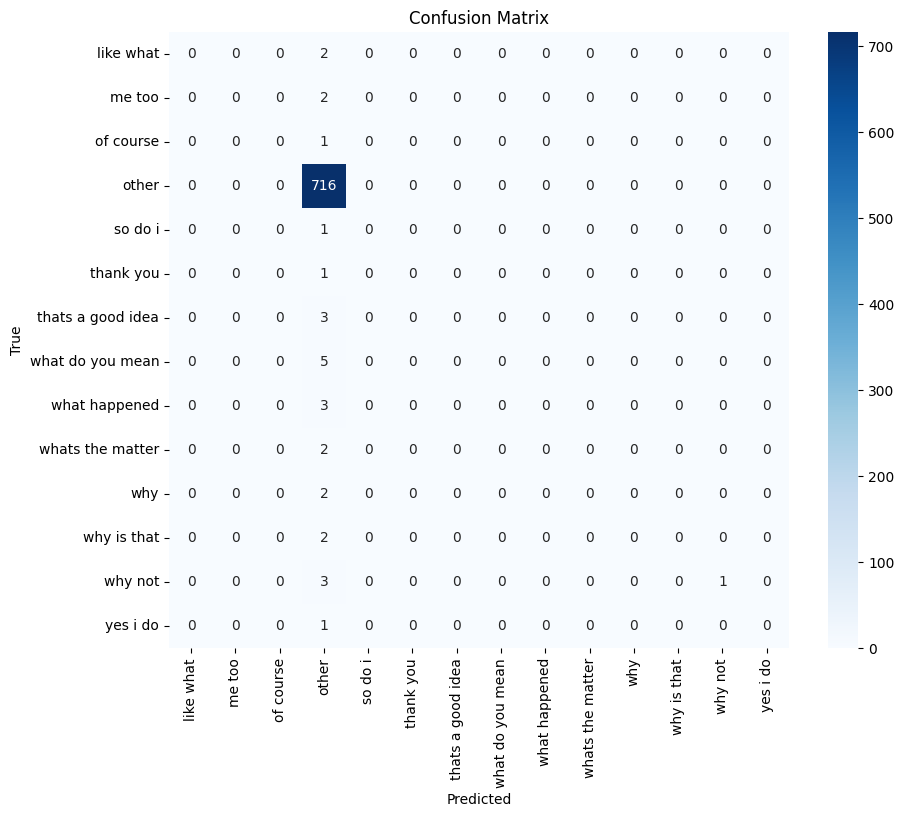

In [12]:
# Confusion Matrix
# Get unique labels that appear in both y_test and y_pred
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)

# Visualisasikan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Simpan Model dan TF-IDF Vectorizer
with open('rizz_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)